In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [6]:
def chirikov_standard_map(p, x, K):
    """Compute the next iteration of the Chirikov Standard Map."""
    p_next = (p + K * np.sin(x)) % (2 * np.pi)
    x_next = (x + p_next) % (2 * np.pi)
    return p_next, x_next

  0%|          | 0/4999 [00:00<?, ?it/s]

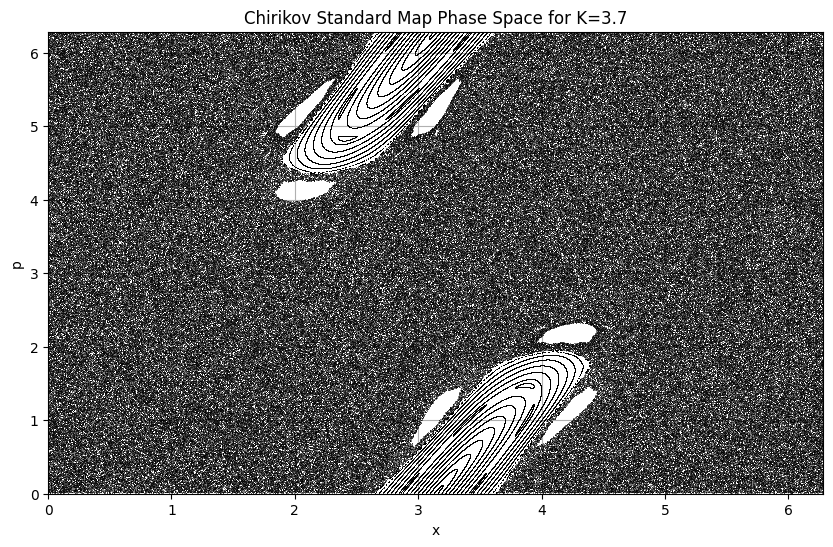

In [58]:
def generate_phase_space(K, iterations, num_points):
    """Generate the phase space plot for the Chirikov Standard Map."""
    # Initialize arrays to store position and momentum
    p_vals = np.empty((num_points, iterations))
    x_vals = np.empty((num_points, iterations))

    # Initial conditions (evenly spaced along x-axis)
    x_vals[:, 0] = np.linspace(-2 * np.pi, 2 * np.pi, num_points)
    p_vals[:, 0] = 0  # Starting with zero momentum for simplicity

    # Iterate the map
    for i in tqdm(range(1, iterations)):
        p_vals[:, i], x_vals[:, i] = chirikov_standard_map(p_vals[:, i-1], x_vals[:, i-1], K)

    # Plotting
    plt.figure(figsize=(10, 6))
    for i in range(num_points):
        plt.plot(x_vals[i], p_vals[i], ',k', alpha=0.5)
    plt.title(f'Chirikov Standard Map Phase Space for K={K}')
    plt.xlabel('x')
    plt.ylabel('p')
    plt.xlim(0, 2*np.pi)
    plt.ylim(0, 2*np.pi)
    plt.grid(True)
    plt.show()

# Parameters
K = 3.7 # Control parameter for the map
iterations = 5000  # Number of iterations to plot
num_points = 200  # Number of initial points

generate_phase_space(K, iterations, num_points)

  0%|          | 0/100 [00:00<?, ?it/s]

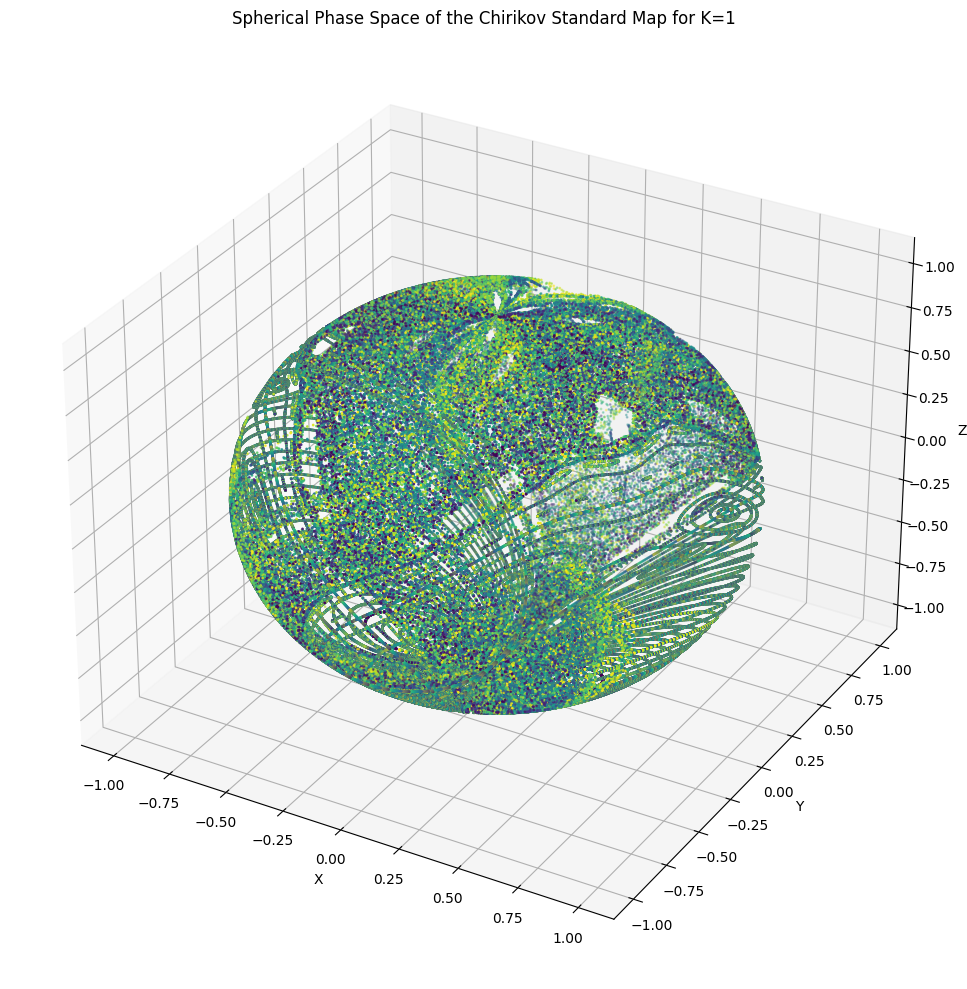

In [26]:
def generate_spherical_phase_space(K, iterations, num_points):
    """Generate a spherical phase space plot for the Chirikov Standard Map."""
    # Initialize arrays for position and momentum
    p_vals = np.empty((num_points, iterations))
    x_vals = np.empty((num_points, iterations))

    # Initial conditions
    x_vals[:, 0] = np.linspace(0, 2 * np.pi, num_points)
    p_vals[:, 0] = 0  # Zero momentum for simplicity

    # Iterate the map
    for i in range(1, iterations):
        p_vals[:, i], x_vals[:, i] = chirikov_standard_map(p_vals[:, i-1], x_vals[:, i-1], K)

    # Convert to Cartesian coordinates for spherical plotting
    xs = np.sin(x_vals) * np.cos(p_vals)
    ys = np.sin(x_vals) * np.sin(p_vals)
    zs = np.cos(x_vals)

    # Plotting
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    for i in tqdm(range(num_points)):
        ax.scatter(xs[i], ys[i], zs[i], c=np.linspace(0, 1, iterations), cmap='viridis', s=1)

    ax.set_title(f'Spherical Phase Space of the Chirikov Standard Map for K={K}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.tight_layout()
    plt.show()

# Parameters
K = 1  # Control parameter for the map
iterations = 4000  # Number of iterations to plot
num_points = 100 # Number of initial points

generate_spherical_phase_space(K, iterations, num_points)

Another code for the Chirikov Standard map, converted from the mathematica code


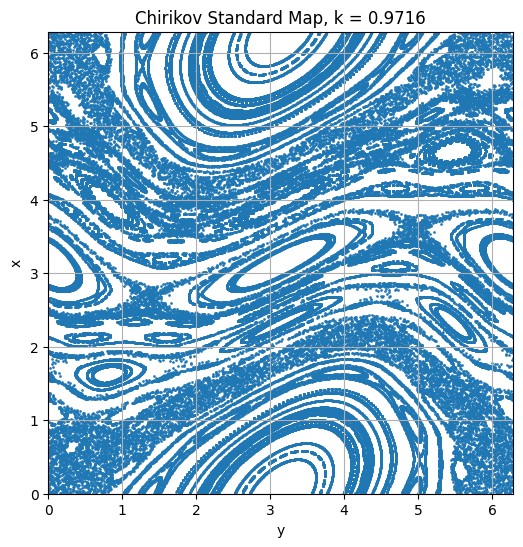

In [57]:
# chaoticity parameter
k = 0.9716
# Number of iterations
n = 1000
# Initialize the list to store points
ps = []

# Loop over 100 different initial conditions
for j in range(100):
    # Initial x and y coordinates randomly chosen in [0, 2π]
    x0 = np.random.uniform(0, 2 * np.pi)
    y0 = np.random.uniform(0, 2 * np.pi)
    x1, y1 = x0, y0

    # Iterate the Chirikov Standard Map
    for i in range(1, n):
        px = (x1 + k * np.sin(y1)) % (2 * np.pi) #
        py = (y1 + px) % (2 * np.pi) #chirikov standard map, x relation
        ps.append([y1, x1])  # Store the current points
        x1, y1 = px, py  # Update for the next iteration

# Convert the list of points to a NumPy array for plotting
ps = np.array(ps)

# Plotting
plt.figure(figsize=(6, 6))
plt.scatter(ps[:, 0], ps[:, 1], s=1, alpha=0.9)
plt.title('Chirikov Standard Map, k = 0.9716')
plt.xlabel('y')
plt.ylabel('x')
plt.xlim(0, 2*np.pi)
plt.ylim(0, 2*np.pi)
plt.grid(True)
plt.show()

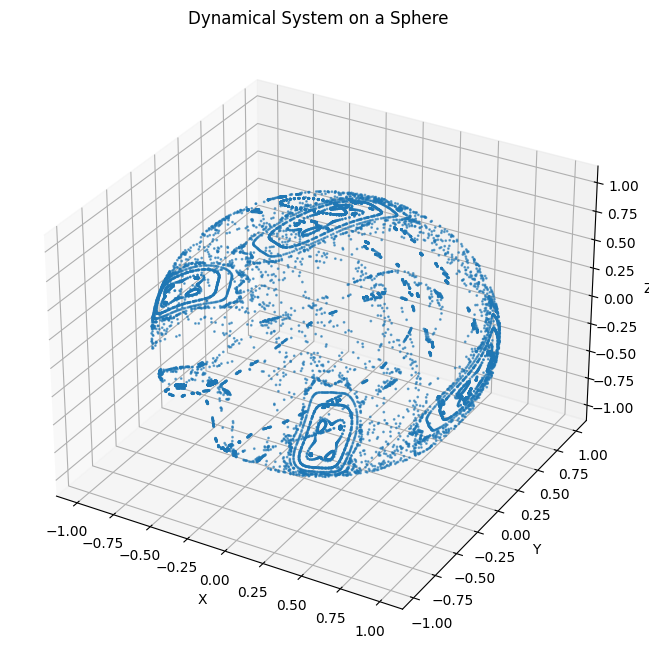

In [45]:
k = 2.5
ps = []

# Generate points
for j in range(16):
    theta = np.random.uniform(0, np.pi)
    phi = np.random.uniform(0, 2 * np.pi)
    x0 = np.sin(theta) * np.cos(phi)
    y0 = np.sin(theta) * np.sin(phi)
    z0 = np.cos(theta)

    for i in range(800):
        x1 = z0 * np.cos(k * x0) + y0 * np.sin(k * x0)
        y1 = -z0 * np.sin(k * x0) + y0 * np.cos(k * x0)
        z1 = -x0
        phi = np.arctan2(y1, x1)
        theta = np.arctan2(np.sqrt(x1**2 + y1**2), z1)
        ps.append([phi, theta])
        x0, y0, z0 = x1, y1, z1

ps = np.array(ps)

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Convert spherical to Cartesian coordinates for plotting
x = np.sin(ps[:, 1]) * np.cos(ps[:, 0])
y = np.sin(ps[:, 1]) * np.sin(ps[:, 0])
z = np.cos(ps[:, 1])

ax.scatter(x, y, z, s = 1, alpha=0.6)
ax.set_title('Dynamical System on a Sphere')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()